# **NSEI Stock prediction using 'regression' model**

# **Project Summary**
The objective of this project is to analyze the closing stock prices of National Stock Exchange of India Limited (NSE). It is one of the leading stock exchanges in India, based in Mumbai. NSE is under the ownership of various financial institutions such as banks and insurance companies. It is the world's largest derivatives exchange by number of contracts traded and the third largest in cash equities by number of trades for the calendar year 2022. It is the 7th largest stock exchange in the world by total market capitalization, as of January 2024. NSE's flagship index, the NIFTY 50, a 50 stock index is used extensively by investors in India and around the world as a barometer of the Indian capital market.

To predict the stock's closing price, it will be acheived by four models namely Linear Regression, Ridge_regression, Lasso_regression, and Random Forest model. The model was trained using the historical stock price data and various features such as mean of Open, High and Low faetures. Additional features were engineered by taking lags to capture the temporal trends and patterns in the data. The performance of the model was evaluated using metrics like MSE (Mean Squared Error) because we used LeaveOneOut cross validation so we can't use R² score.

The analysis aimed to uncover any patterns or changes in stock prices.

# **Problem Statement**

National Stock Exchange was incorporated in the year 1993 to bring about transparency in the Indian equity markets. NSE was set up at the behest of the Government of India. NSE EMERGE is NSE's new initiative for Small and medium-sized enterprises (SME) & Startup companies in India. These companies can get listed on NSE without an Initial public offering (IPO). This platform will help SME's & Startups connect with investors and help them with the raising of funds. We fetch this actual data through HTTP request from [https://finance.yahoo.com/](https://finance.yahoo.com/quote/%5ENSEI) and this dataset has daily stock prices of the NSEI since one last year and includes closing, opening, highest, lowest and adjacent close stock prices. The main objective is to predict the stock’s closing price.

# **Objective**
The ultimate business objective is to use the regression model to provide accurate predictions of the closing price of NSEI stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases and align investment strategies with financial goals.

## Information about dataset

1. ***Date***: The date when the stock data was recorded.
2. ***Open***: The date when the stock data was recorded.
3. ***High***: The highest price the stock reached during the trading day.
4. ***Low***: The highest price the stock reached during the trading day.
5. ***Close***: The price of the stock when the market closed on that particular date.
6. ***Adj Close***: The adjusted closing price reflects the stock's value after accounting for any corporate actions such as dividends, stock splits, or mergers.
7. ***Volume***: The price of the stock when the market closed on that particular date.


**Adjusted Closing** price: The adjusted closing price is a modification of a stock's closing price that accounts for any corporate actions that may affect the stock's value. These corporate actions can include dividends, stock splits, spin-offs, and mergers.<br>For example, when a company pays a dividend, the stock's price typically decreases by the amount of the dividend after the dividend is paid. To accurately track the stock's performance over time, analysts adjust historical closing prices to reflect these changes. This adjustment ensures that historical price charts and calculations accurately represent the stock's value, accounting for all relevant corporate actions.<br>In summary, the adjusted closing price is the closing price of a stock after accounting for any corporate actions that may affect its value, providing a more accurate representation of its performance over time.

# **GitHub** Link

* [GitHub profile](https://www.github.com/FirmBase)
* [GitHub project](https://github.com/FirmBase/NSEI-Stock-close-price-prediction.git)

## Steps:

1. Retrive Data
2. Overview Data
3. Understanding Data
4. Data Cleaning
5. Data Manipulation
6. Data Visualization
7. Hypothesis Testing
8. Feature Engineering and Data Pre-processing
9. Data Splitting:
10. Machine Learning models implementation
	1. Linear Regression
	2. Ridge Regression
	3. Lasso Regression
	4. Random Forest Regressor
	5. XG Boost
11. Conclusion

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# ***Step 1. Retrieve Data***

### Data Gathering from API

In [3]:
import requests
import io

url = "https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1682594614&period2=1714217014&interval=1d&events=history&includeAdjustedClose=true"

# Setting 'User-Agent' is necessary as server seems to reject request by responding status code 429.
header = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0" }

def getFileFromHTTPRequest(url, head):
	try:
		response = requests.get(url, headers=head)
		if response.status_code == 200:
			file = pd.read_csv(io.StringIO(requests.get(url, headers=head).content.decode('utf-8')))
			print(url, "loaded.")
			return file
		else:
			print("CSV fetching failed with response code:", response.status_code)
	except requests.exceptions.HTTPError as err:
		print("HTTP error:", err)
	except Exception as err:
		print("Error:", err)

# Since we have limited HTTP request from server so we are commenting it but data can be fetched HTTP request to get NSEI stock.
# df = getFileFromHTTPRequest(url, header)
# df.head()

https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1682594614&period2=1714217014&interval=1d&events=history&includeAdjustedClose=true loaded.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600


* Since we have limited HTTP request from server so we are commenting it but data can be fetched HTTP request to get NSEI stock.

### Link for direct download fetched data

https://raw.githubusercontent.com/FirmBase/NSEI-Stock-close-price-prediction/main/Dataset/NSEI.csv

### Connect Google Drive for **Google Colab**

In [5]:
# Load dataset
# from google.colab import drive		# Mounting the google drive to the colab
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/Dataset/NSEI.csv")
# df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600


### Load dataset from **GitHub** repository

In [3]:
import requests
import io

def getFileFromURL(url):
	try:
		response = requests.get(url)
		if response.status_code == 200:
			file = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
			print(url, "loaded.")
			return file
		else:
			print("CSV fetching failed with response code:", response.status_code)
	except requests.exceptions.HTTPError as err:
		print("HTTP error:", err)
	except Exception as err:
		print("Error:", err)

df = getFileFromURL("https://raw.githubusercontent.com/FirmBase/NSEI-Stock-close-price-prediction/main/Dataset/NSEI.csv")
df.head()

https://raw.githubusercontent.com/FirmBase/NSEI-Stock-close-price-prediction/main/Dataset/NSEI.csv loaded.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600


### Converting it into dataframe and make a csv file

In [ ]:
df.to_csv("NSEI.csv", index=False)

* Converting that data into dataframe and defining it's column names and converting into csv to use further.

# ***Step 2. Overview Data***

### Dataset Rows & Columns count

In [14]:
{'Rows': df.shape[0], 'Columns': df.shape[1]}

{'Rows': 246, 'Columns': 7}

### Dataset Information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       246 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


### Check for Null/Missing Values

In [16]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Check for duplicated rows

In [17]:
df.duplicated().sum()

0

### What did you know about your dataset?

* We get this data from yahoo finance by calling there public API to get their AMRN stock price for US region.
This API reproduces live PUBLIC data and features of finance.yahoo.com. The response data is always live and synced with the site at request time. You are going to get almost everything that you see PUBLICLY on the site.

* As per the above information, we can see the columns open, high, low, close are float type while date and volume are int type of data.

**There are 251 rows and 7 columns**

**There are no null values present in our data**

**There are no duplicated rows present in our data**

**The following columns are listed in the DataFrame-**
* Unnamed: 0 - It is a index column of int type.
* date - It describes the date on which prices is defined but it's in encrypted form so we have to handle it and according to offset we have to convert in into datetime.
* open - It describes at what price the stock is open on that date.
* high - It describes the maximum price the stock is on that date.
* low - It describes the minimum price the stock is on that date.
* close- It describes at what price the stock is close on that date.
* volume - It describes the volume of shares on that date.
* adjclose - It describes the adjacent close price on that date.

# ***Step 3. Understanding Data***

#### Columns present in our data

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Mathematical/Statistical description of our data

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,20286.672145,20360.403011,20196.322528,20283.336827,20283.336827,281702.439024
std,1388.179346,1403.215996,1370.975843,1387.109909,1387.109909,89130.190459
min,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,0.000000
25%,19370.462402,19424.112305,19296.337890,19349.562012,19349.562012,226675.000000
50%,19768.950196,19825.575195,19691.024414,19747.125000,19747.125000,265450.000000
75%,21727.562500,21803.699219,21589.062500,21723.761719,21723.761719,328325.000000
max,22765.099609,22775.699219,22673.699219,22753.800781,22753.800781,696500.000000


In [20]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

There are 251 rows and 7 columns.

There are no null values present in our data.

There are no duplicated rows present in our data.

**The following columns are listed in the DataFrame-**
* Unnamed: 0 - It is a index column of int type.
* date - It is of int data type.
* open - It is of float data type.
* high - It is of float data type.
* low - It is of float data type.
* close- It is of float data type.
* volume - It is of int data type.
* adjclose - It is of float data type.

# ***Step 4. Data Cleaning***

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600


2. There is no column that is unnecessary to drop.

3. lets check for missing values and duplicate rows in our dataset

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum()

0



*   In our dataset there is no null values
*   there is no duplicated rows

---


  so we will directly going to check for outliars in our dataset



4. Outliars detection and removal

* we have plot Boxplot of all columns to see any potential outliars in our dataset




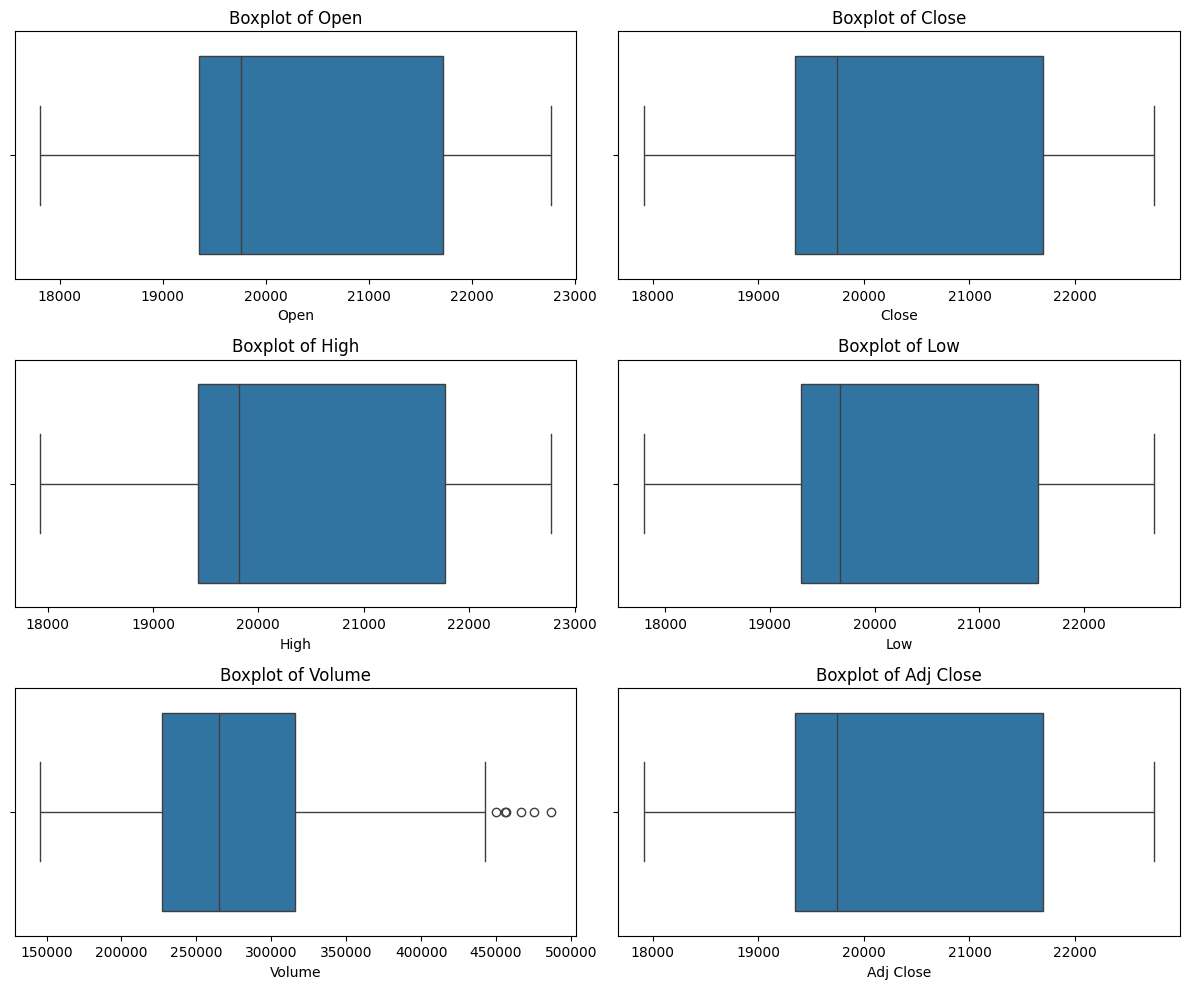

In [120]:

# Create subplots
key_variables = ['Open','Close', 'High', 'Low', 'Volume', 'Adj Close']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
	sns.boxplot(x=variable, data=df, ax=axes[i])
	axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()


*   we can see there is no significant outliars present in our dataset and some extreme values could be our genuine data points.


### Removing rows with zero values

In [4]:
df = df[(df != 0).all(axis=1)]

## Data Cleaning Summary

*   checked for null and duplicate values in our dataset for removal but there is no any present.
*   plotted boxplot for outliars detection and removal but there were no such significant outliars found.

# ***Step 5. Data Manipulation***

1. Making sure `Date` column is in standard date format.

In [5]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
df.head()

,date,open,high,low,close,volume,adjclose
0,2024-02-09,1.25,1.25,1.21,1.22,985700,1.22
1,2024-02-08,1.20,1.25,1.20,1.23,810400,1.23
2,2024-02-07,1.23,1.25,1.19,1.20,931200,1.20
3,2024-02-06,1.17,1.24,1.17,1.23,978500,1.23
4,2024-02-05,1.15,1.20,1.15,1.18,670000,1.18


2. we sort our dataset by date for further analysis

In [6]:
df = df.sort_values('Date')

3. we set `date` as index and convert it into datetime format

In [7]:
# we changed the index of dataset to datetime format for further analysis
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Identify outliers using IQR (Interquartile Range)
def filterRows(dataset, col):
	for iter in col:
		q1 = dataset[iter].quantile(0.25)
		q3 = dataset[iter].quantile(0.75)
		iqr = q3 - q1
		dataset = dataset[(dataset[iter] >= (q1 - (1.6 * iqr))) & (dataset[iter] <= (q3 + (1.6 * iqr)))]
	return dataset

df = filterRows(df.copy(), ['Open','Close', 'High', 'Low', 'Volume','Adj Close'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600
...,...,...,...,...,...,...,...
241,2024-04-22,22336.900391,22375.650391,22198.150391,22336.400391,22336.400391,279300
242,2024-04-23,22447.050781,22447.550781,22349.449219,22368.000000,22368.000000,231500
243,2024-04-24,22421.550781,22476.449219,22384.000000,22402.400391,22402.400391,235900
244,2024-04-25,22316.900391,22625.949219,22305.250000,22570.349609,22570.349609,475000


In [116]:
df.head() # here we converted date column into index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
1,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300
2,2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200
3,2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200
4,2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600


## Data Manipulation Summary



*   we changed the `date` column to the standard date format and converted it into `datetime` data Type

*   we sort our dataset by `date` for further analysis

*   we set `date` as index and convert it into datetime format




# ***Step 6. Data Visualization***



###   Chart 1 : Line plot



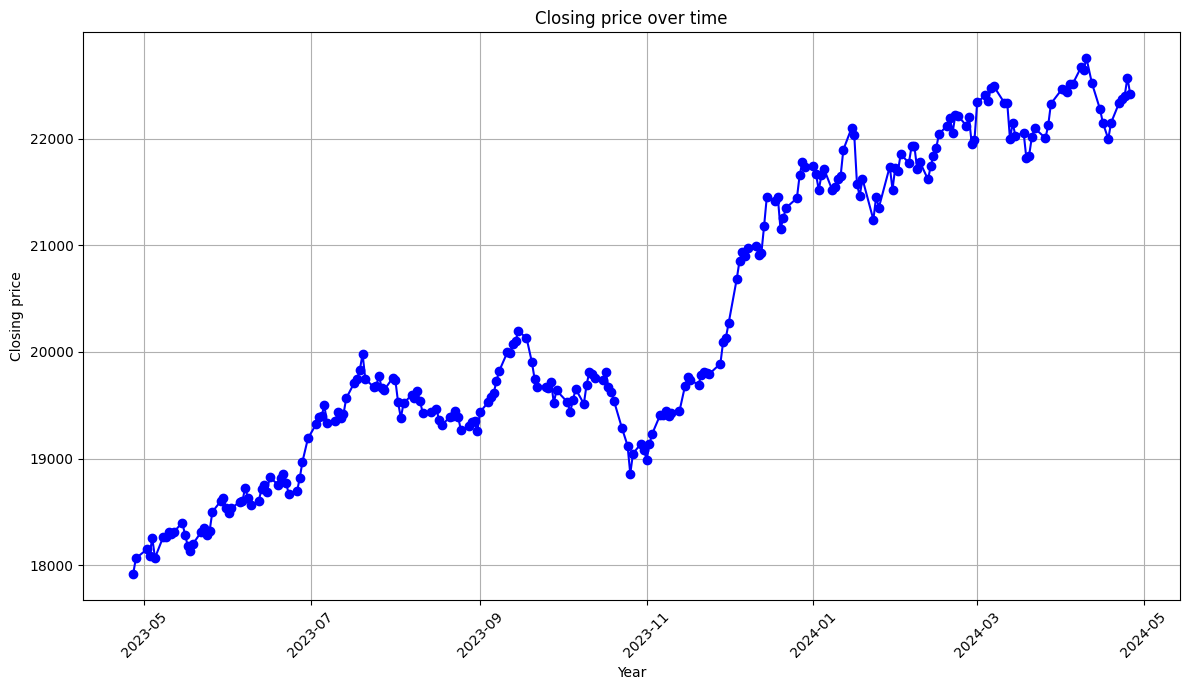

In [13]:
plt.figure(figsize=(12,7))
# df['Close'].plot(color = 'b')
plt.plot(df['Date'], df['Close'], color='b', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.title('Closing price over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

Since line charts are particularly useful for displaying trends and patterns in data over time so it is appropriate to use this here.

2. What is/are the insight(s) found from the chart?

It can seen that from the 3rd month of 2023 closing price was declining but after the 11th month of the same year it started to increase.

### Chart 2 : Line chart

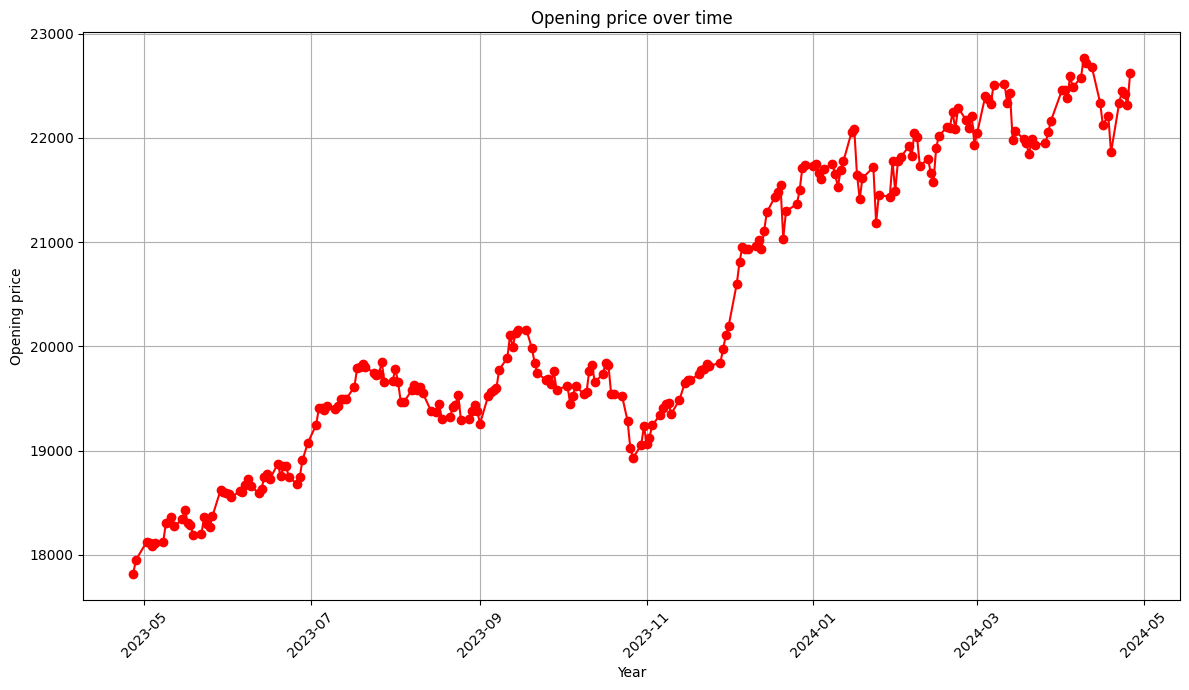

In [14]:
plt.figure(figsize=(12,7))
# df['open'].plot(color = 'r')
plt.plot(df['Date'], df['Open'], color='r', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Opening price')
plt.title('Opening price over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

Line charts can display continuous data over time, set against a common scale, and are therefore ideal for showing trends in data at equal intervals or over time.

2. What is/are the insight(s) found from the chart?

It can be inferred from the above graph that till november opening price is decreasing and after that there is sudden increase in opening price.

### Chart 3 : Distribution Plot

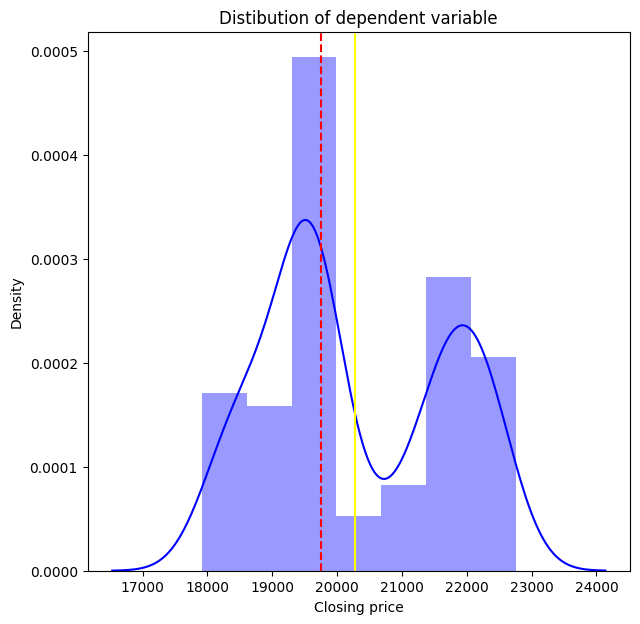

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(df['Close'], color="b")
plt.title('Distibution of dependent variable')
plt.xlabel('Closing price')

plt.axvline(df['Close'].mean(), color='yellow')
plt.axvline(df['Close'].median(), color='red', linestyle='dashed')
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

We can observe from the data that `close` column is somewhat following normal distribution.
As we are aware that if the data is normally distributed, it becomes easy to develop a good model that can be seen here.

### Chart 4 : Distribution Plot

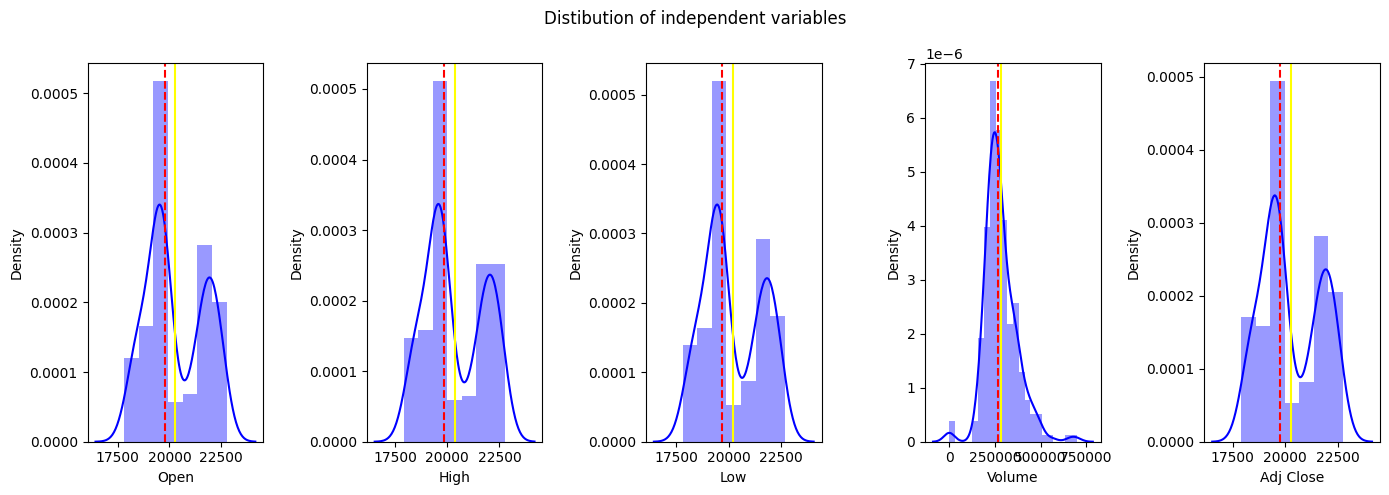

In [18]:
plt.figure(figsize=(14, 5))

for i, col in enumerate(['Open', 'High', 'Low', 'Volume', 'Adj Close']):
	plt.subplot(1, 5, i+1)
	sns.distplot(df[col], color='b')
	plt.xlabel(col, fontsize=10)

	# Plotting the mean and the median.
	plt.axvline(df[col].mean(), color='yellow')
	plt.axvline(df[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

 This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

All the columns except volume are somewhat following normal distribution but volume column has right skewed distribution.

### Chart 5: Distribution Plot

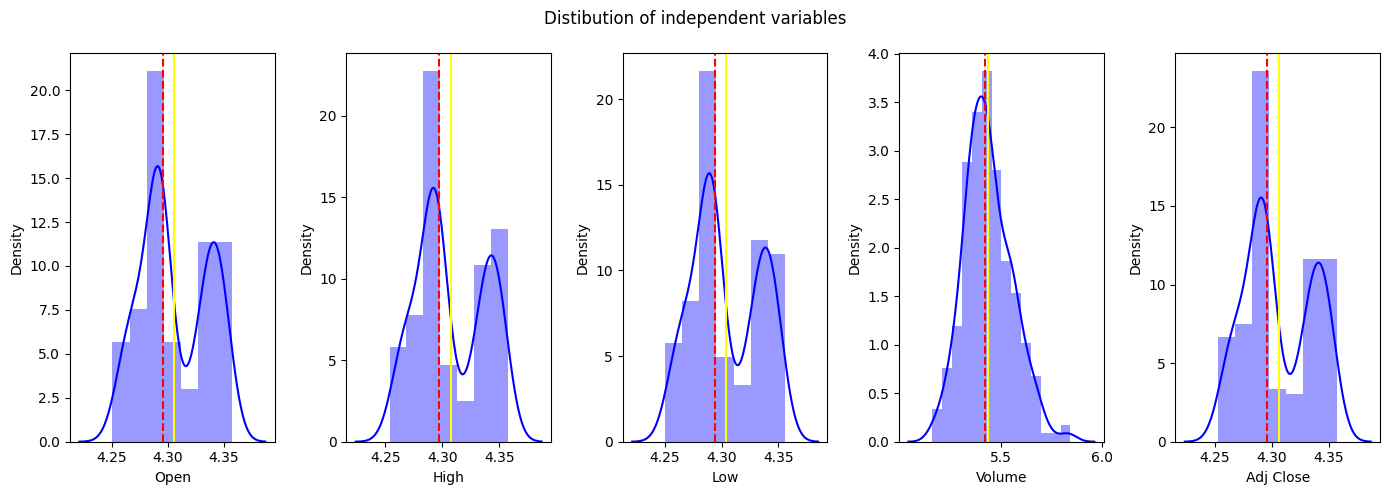

In [5]:
plt.figure(figsize=(14, 5))
df_ = df[(df != 0).all(axis=1)]
for i, col in enumerate(['Open', 'High', 'Low', 'Volume', 'Adj Close']):
	plt.subplot(1, 5, i+1)
	sns.distplot(np.log10(df_[col]), color='b')
	plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
	plt.axvline(np.log10(df_[col]).mean(), color='yellow')
	plt.axvline(np.log10(df_[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution.

### Chart 6 : Candlestick Chart

In [ ]:
# importing mplfinanace library to plot Candlestick chart
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


<Figure size 1200x600 with 0 Axes>

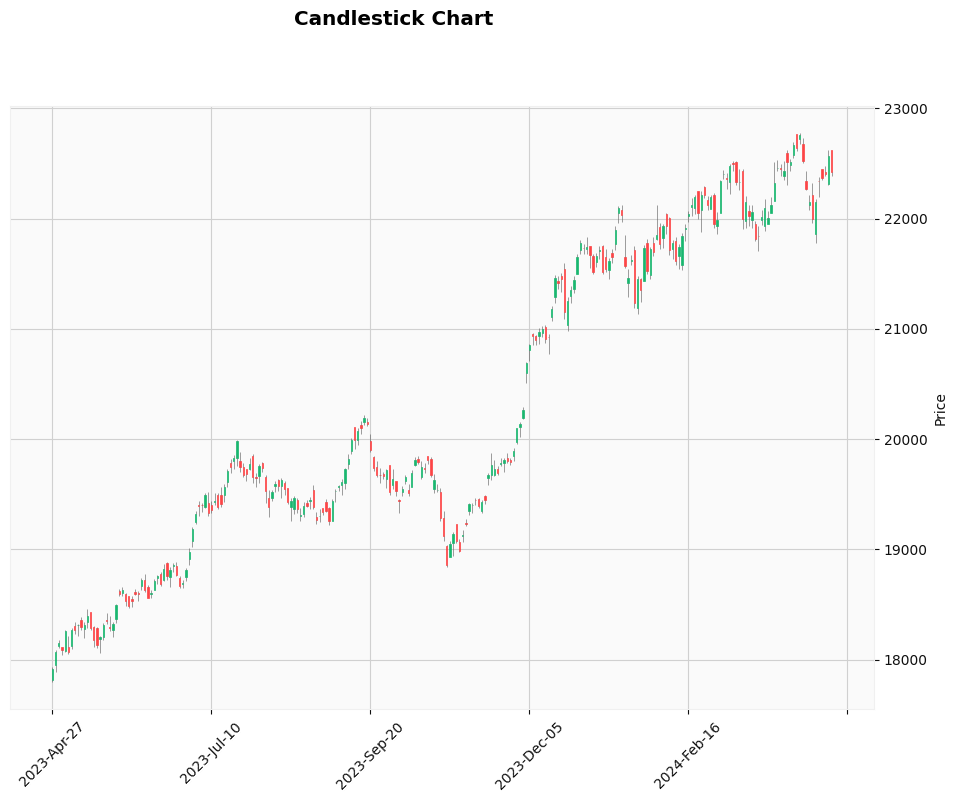

In [19]:

plt.figure(figsize= (12,6))
import mplfinance as mpf

df_candle = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_candle.set_index('Date', inplace=True)
df_candle.index = pd.to_datetime(df_candle.index)
mpf.plot(df_candle, type='candle', style='yahoo', figscale=1.5, title='Candlestick Chart')

1. Why did you pick the specific chart?

A candlestick graph is primarily used in technical analysis of financial markets, particularly in stock trading, to visualize the price movements of a financial asset over a specific period of time

2. What is/are the insight(s) found from the chart?

It can be seen from the data that, there is no much deviation from the price shown by open, high, low.
As it is important to make sure that there is no huge variation in the data.

### Chart 7 : Boxplot Chart

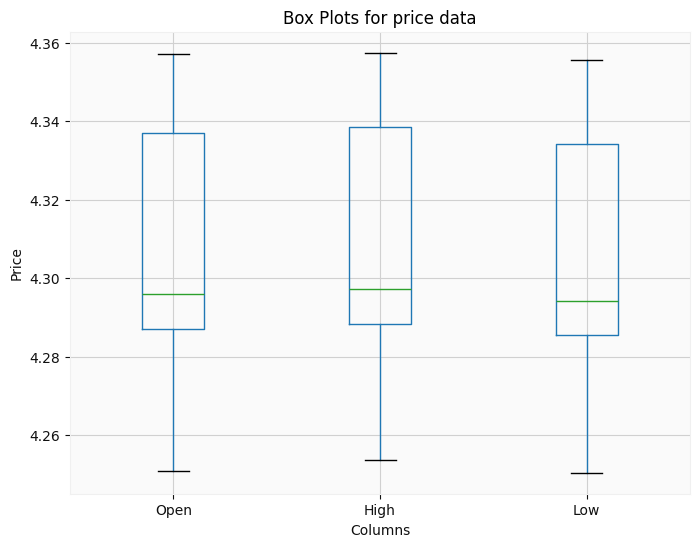

In [20]:
# we have applied log transformtion in these column before plotting boxplot to get rid of some outliars
df_price = np.log10(df[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for price data')
plt.show()

1. Why did you pick the specific chart?

BoxPlot is used to identify if outliers exists or not in the independent variables.

2. What is/are the insight(s) found from the chart?

We can understand that after transformation is applied, outliers appeared to be diminished.

### Chart 8 : Scatter Plot

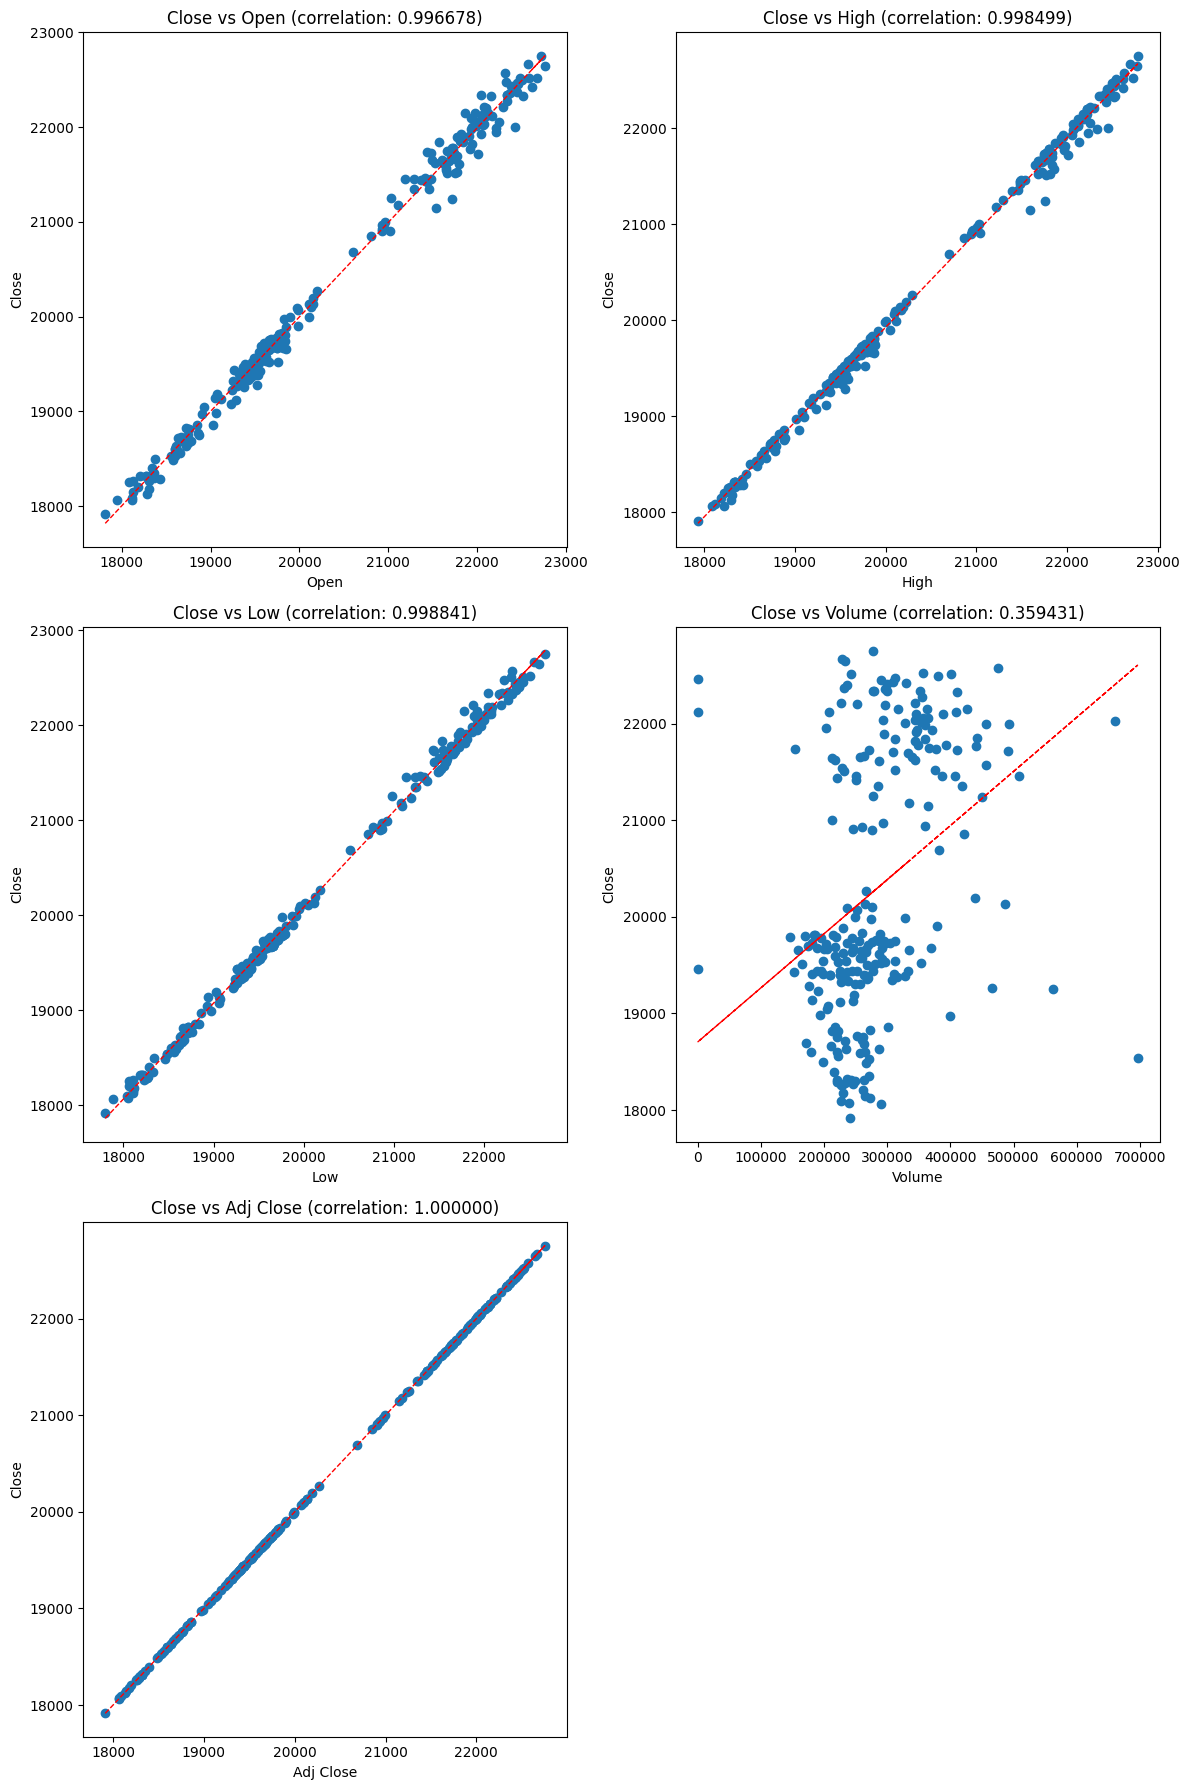

In [9]:
# Creating Subplots for various scatterplot between numerical columns
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, col in enumerate(['Open', 'High', 'Low', 'Volume', 'Adj Close']):
	feature = df[col]
	label = df['Close']
	correlation = feature.corr(label)

    # Scatter plot
	axes[i // 2, i % 2].scatter(x=feature, y=label)
	axes[i // 2, i % 2].set_xlabel(col)
	axes[i // 2, i % 2].set_ylabel('Close')
	axes[i // 2, i % 2].set_title(f'Close vs {col} (correlation: {correlation:.6f})')

	# Linear regression line
	z = np.polyfit(feature, label, 1)
	y_ = np.poly1d(z)(feature)
	axes[i // 2, i % 2].plot(feature, y_, "r--", lw=1)

# Remove any empty plots
for i in range(len(['Open', 'High', 'Low', 'Volume', 'Adj Close']), 6):
	fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

1. Why did you pick the specific chart?

Scatter plot is used to to understand relationship of numerical columns with each other

2. What is/are the insight(s) found from the chart?

Here we showed relationship of all the independent columns with the dependent column and can understand that all columns except volume column are having linear or sort of linear relationship with dependent column.

### Chart 9 : Heatmap

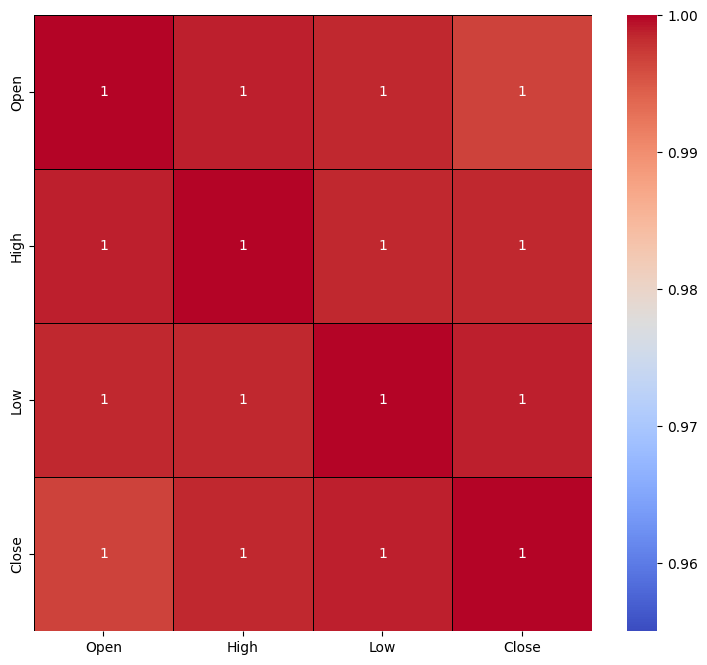

In [14]:
plt.figure(figsize=(9,8))
correlation = df[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=0.955, vmax=1, linecolor='black', linewidths=0.5)
plt.show()

1. Why did you pick the specific chart?

Heatmap is use to identify the correlation between variables.

2. What is/are the insight(s) found from the chart?

As it is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector so is evident here.

### Chart 10: Pair Plot

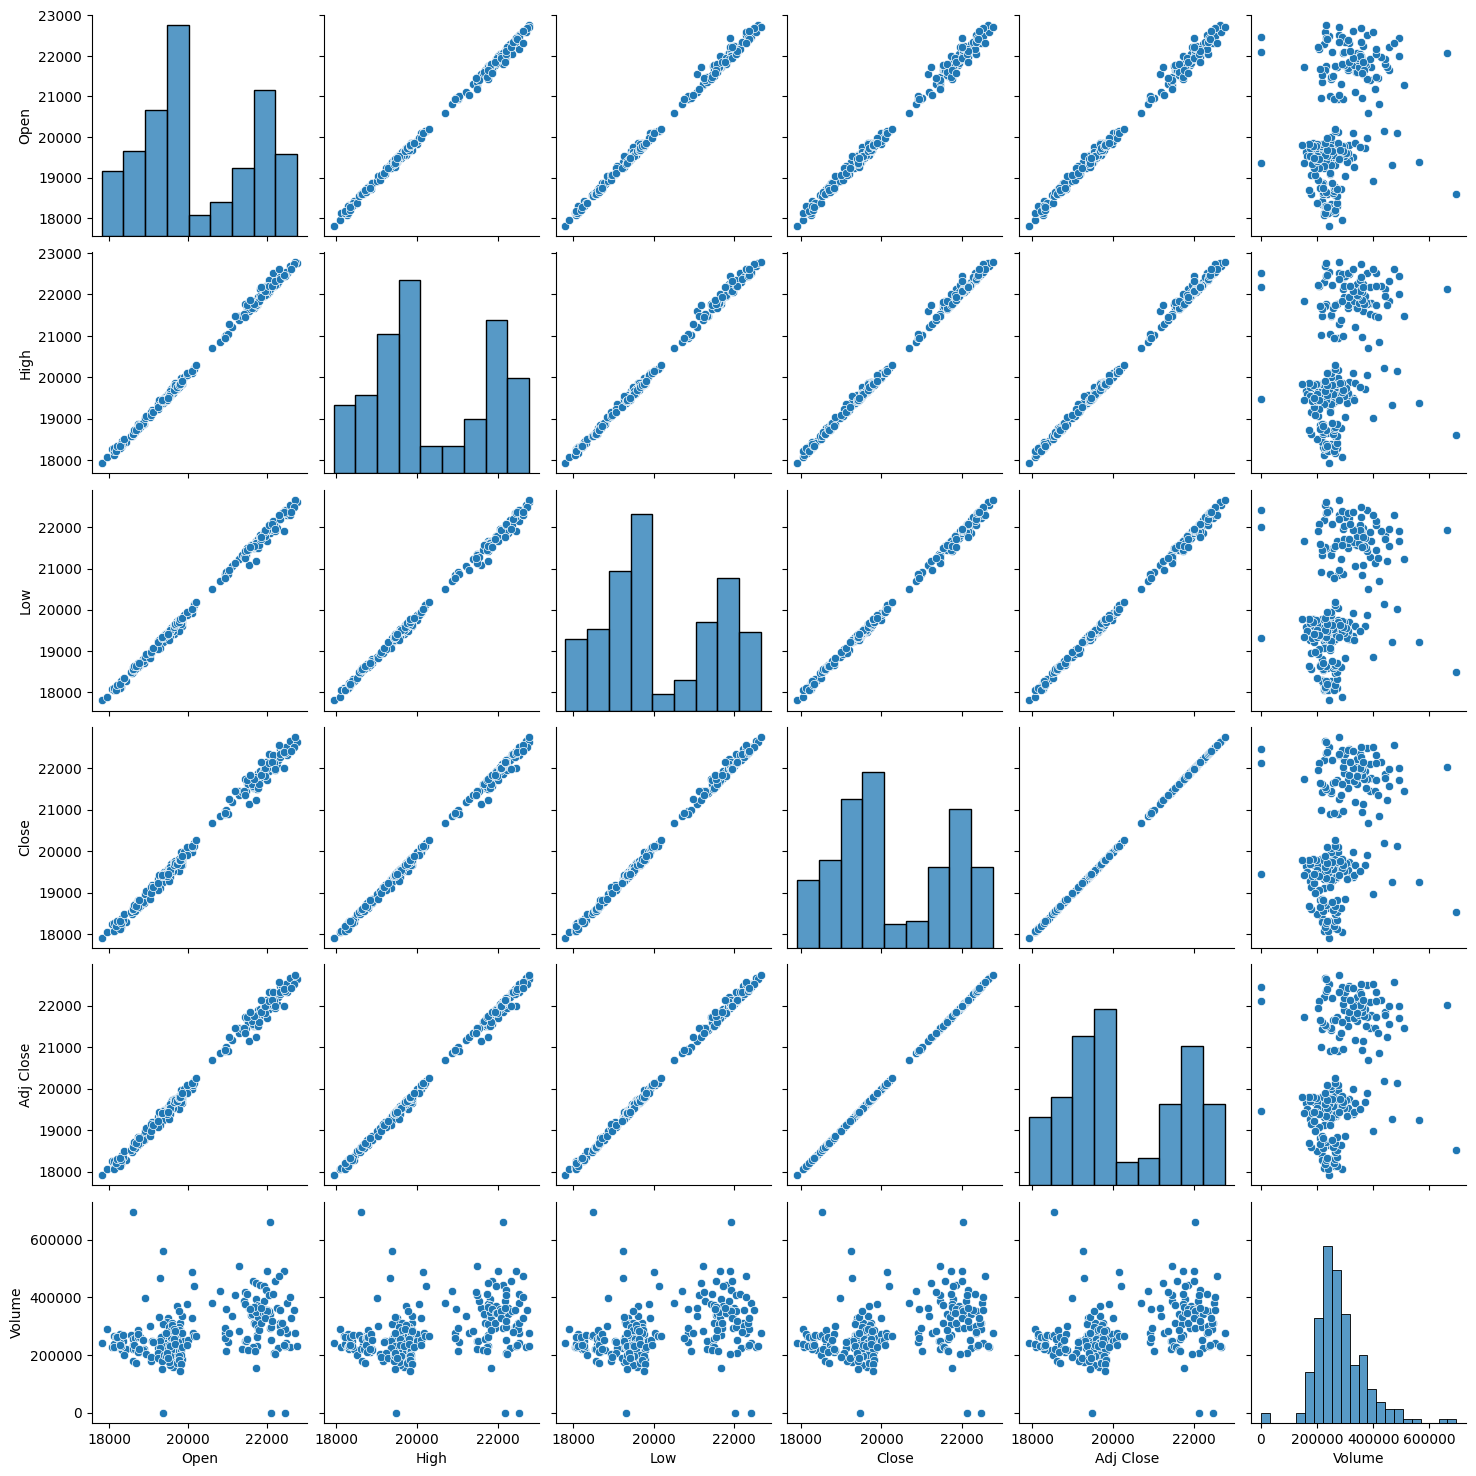

In [10]:
# Pair Plot visualization code

sns.pairplot(df)
plt.show()

1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables.

2. What is/are the insight(s) found from the chart?

It can be inferred from the above charts that all columns share linear relationship and follow normal distribution except volume column.

# ***Step 7. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. Perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* We are performing here a hypothesis test to check our stock performance throughout the year to ensure our stock growth or stock decline by making a null hypothesis statement that our stock performance for the first 6 month is same as last 6 months.


* Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

* Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

#### 2. Perform an appropriate statistical test.

In [9]:
df_ = df[(df != 0).all(axis=1)]
data = df_.set_index('Date', inplace=False)
data.index = pd.to_datetime(data.index)


In [10]:
start_date = min(data.index.date)
end_date = max(data.index.date)

midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = data[data.index.date < midpoint_date]
second_half = data[data.index.date >= midpoint_date]

In [44]:
# Perform Statistical Test to obtain P-Value

# Divide the dataset into two halves: first half and second half
midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = data[data.index.date < midpoint_date]
second_half = data[data.index.date >= midpoint_date]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half['Close'])
mean2 = np.mean(second_half['Close'])
std1 = np.std(first_half['Close'])
std2 = np.std(second_half['Close'])

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)

# Calculate the standard error of the difference between means
standard_error = np.sqrt(se1**2 + se2**2)

# Calculate the t_test
t_stat = (mean1 - mean2) / standard_error

#Significance level
alpha = 0.05

#Degree of freedom
dodf = n1 + n2 - 2

#calculating probability point function
cv = stats.t.ppf(1.0 - alpha, dodf)

# Calculate the p-value (two-tailed test)
p_value = (1 - stats.t.cdf(abs(t_stat), dodf)) * 2

# Set the significance level
alpha = 0.05

print('The p value for 0.05 significance level is {:.5f}'.format(p_value))

# Compare the p-value with the significance level
if p_value < alpha:
	print("Reject the null hypothesis. There is a significant difference in means.")
else:
	print("Fail to reject the null hypothesis. There is no significant difference in means.")

The p value for 0.05 significance level is 0.00000
Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value and why?

* We performed t test here to optain p value as we have a sample dataset and we are making inference about population and our population parameters are not known to us.

# ***Step 8. Feature Engineering and Data Pre-processing***

### 1. Handling Missing Values

In [45]:
#There are no missing values in the dataset.

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 2. Handling Outliers

* We already handled our outliers previously and did transformation.

### 3. Categorical Encoding

* There are no categorical variables in this dataset.

### 4. Feature Manipulation & Selection

#### a. Feature Manipulation

In [11]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean
#from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.
df = data.copy()

# df['Mean_Open_High_Low'] = round(df[['Open', 'High', 'Low']].mean(axis=1), 2)
df['Mean_Open_High_Low'] = df[['Open', 'High', 'Low']].mean(axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Mean_Open_High_Low
Date,,,,,,,
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,17847.533203
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,17974.950521
2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200,18135.600260
2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200,18090.850260
2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600,18138.382813


* Here we have a very high correlation between open, high, and low columns so to reduce the multicollinearity of our data we are combing all these columns by calculating the mean of all these to reduce multicollinearity without losing its glimpse.

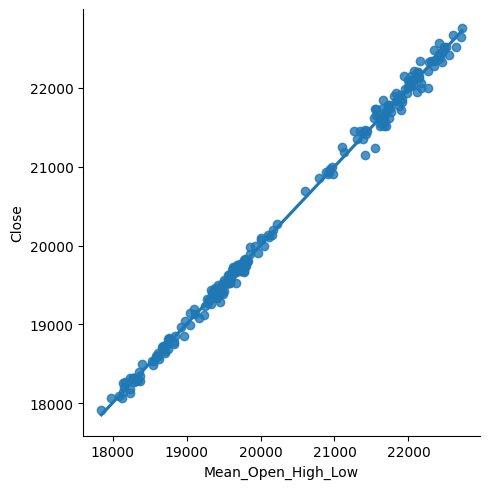

In [48]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_Open_High_Low', y='Close', fit_reg=True, data=df)

* Here we are checking that realtionship between that combined mean column and our close price and we can see we have a linear relationship.

<Axes: xlabel='Mean_Open_High_Low', ylabel='Density'>

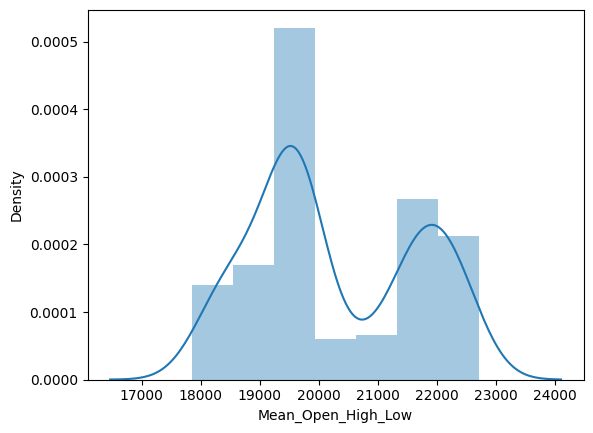

In [12]:
tri_al = df['Mean_Open_High_Low']
sns.distplot(tri_al)

* After transforming our mean column, we are checking for its distribution.

In [13]:
for i in range(1, 11):
	df["lag_{}".format(i)] = df.Mean_Open_High_Low.shift(i)

* Here to capture the temporal trends and patterns in the data we are taking lag terms last 10 days to get an idea how our share is performing, so we are doing a lag so we can get a glimpse or generalized pattern of our share like we as a human do before buying the share we analyzed how that particular share is doing for the last some days.

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Mean_Open_High_Low,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,,,,,
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,17847.533203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,17974.950521,17847.533203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-02,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200,18135.600260,17974.950521,17847.533203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-03,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200,18090.850260,18135.600260,17974.950521,17847.533203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-04,18081.000000,18267.449219,18066.699219,18255.800781,18255.800781,226600,18138.382813,18090.850260,18135.600260,17974.950521,17847.533203,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [14]:
y_depend = df.dropna().Close.values
x_independ = df.dropna().drop(['Close', 'Open', 'High', 'Low', 'Adj Close'], axis=1)  #adjclose is same like close

* Here we are dropping all these highly correalated columns because it can hamper our result and we already took mean of that and we are taking that mean instead of all these columns and adjclose is a duplicate column of close price that is our target column so we have to drop it because it's of no use.
* We are dropping all our NaN values because we already took generalization and our ML model cannot take NaN values.

In [126]:
x_independ.head()

,Volume,Mean_Open_High_Low,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,
2023-05-12,241700,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60,17974.95,17847.53
2023-05-15,216100,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60,17974.95
2023-05-16,219500,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60
2023-05-17,229900,18241.60,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85
2023-05-18,272100,18229.85,18241.60,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,we have used log transformation because in `volume` column there is very large values present that can dominate other columns in prediction and little bit of skewed also.
Hence it will normalise our indepandent variables for further analysis.

In [15]:
x_trans = x_independ.copy()

In [16]:
# y_trans = pd.DataFrame(np.log10(y_depend))
y_trans = y_depend

In [129]:
x_trans.head()

,Volume,Mean_Open_High_Low,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,
2023-05-12,241700,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60,17974.95,17847.53
2023-05-15,216100,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60,17974.95
2023-05-16,219500,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85,18135.60
2023-05-17,229900,18241.60,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38,18090.85
2023-05-18,272100,18229.85,18241.60,18376.35,18362.03,18270.35,18339.30,18284.10,18292.42,18169.28,18129.90,18138.38


### 6. Data Scaling

* After log Transformation our dataset is already in same scale so no need to Data Scalling Further

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As we have only few features, dimensionality reduction is not necessary because if we reduce of dataset dimensions further it will lead to underfitting.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, our dataset is not imbalanced.

# ***Step 9. Data Splitting***

 * Data Splitting

In [17]:
# we are taking transformed variable for x and y which we got after applying Log Transformation
x = x_trans
y = y_trans

In [18]:
# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size=0.2, random_state=42)

In [21]:
{'Train': {'x': x_train.shape, 'y': y_train.shape}, 'Test': {'x': x_test.shape, 'y': y_test.shape}}

{'Train': {'x': (186, 12), 'y': (186,)}, 'Test': {'x': (47, 12), 'y': (47,)}}

# ***Step 10. Machine Learning models implementation***

## Model 1: **Linear Regression**

In [27]:
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred_train_lr = model.predict(x_train)
y_pred_test_lr = model.predict(x_test)

In [30]:
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
# Calculate R² (Coefficient of Determination)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_train_lr = 1 - ((1 - r2_train_lr) * (x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))

metric_train_lr = {'Mean Squared Error': mse_train_lr, 'Root Mean Squared Error': rmse_train_lr, 'Mean Absolute Error': mae_train_lr, 'R² Score': r2_train_lr, 'Adjusted R²': adjusted_r2_train_lr}
pd.DataFrame({'Parameters': [element_key for element_key in metric_train_lr.keys()], 'Results': [element_value for element_value in metric_train_lr.values()]})

,Parameters,Results
0,Mean Squared Error,5758.520880
1,Root Mean Squared Error,75.884919
2,Mean Absolute Error,55.461982
3,R² Score,0.996682
4,Adjusted R²,0.996452


In [31]:
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
# Calculate R² (Coefficient of Determination)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_test_lr = 1 - ((1 - r2_test_lr) * (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))

metric_test_lr = {'Mean Squared Error': mse_test_lr, 'Root Mean Squared Error': rmse_test_lr, 'Mean Absolute Error': mae_test_lr, 'R² Score': r2_test_lr, 'Adjusted R²': adjusted_r2_test_lr}
pd.DataFrame({'Parameters': [element_key for element_key in metric_test_lr.keys()], 'Results': [element_value for element_value in metric_test_lr.values()]})

,Parameters,Results
0,Mean Squared Error,5984.608095
1,Root Mean Squared Error,77.360249
2,Mean Absolute Error,62.171694
3,R² Score,0.996942
4,Adjusted R²,0.995863


* Here we used train test split method for splitting the data and we did experimentation on `train_test_split` and `leave_one_out_menthod`, but in leave one out we can't check r2 score because in leaveoneout will calculate for each row for each row our sum of squared error about mean and sum of squared about regression line will become same and r2 score will be 0 so in `leave_one_out_menthod` we didn't have r2 score metric but by doing all these experiment we found a negligible change so we stick out on LOO to try and do new thing.



*  Hence we used `LeaveOneOut` cross validation technique to split our data because our dataset is small in size and it will give good results



In [62]:
model = LinearRegression()

loo = LeaveOneOut()

scores = cross_val_score(model, x_trans, y_trans, cv=loo, scoring='neg_mean_squared_error')
prediction = cross_val_predict(model, x_trans, y_trans, cv=loo)

# we have salected MSE as our Evaluation Matrix in all models for evaluating their performance.
# As R2 Score will not give good results in LeaveOneOut CV

# Print the average score (mean squared error in this case)
print("Average negative mean squared error:", -scores.mean())
# print("Predictions:", prediction)

Average negative mean squared error: 6653.558614164148


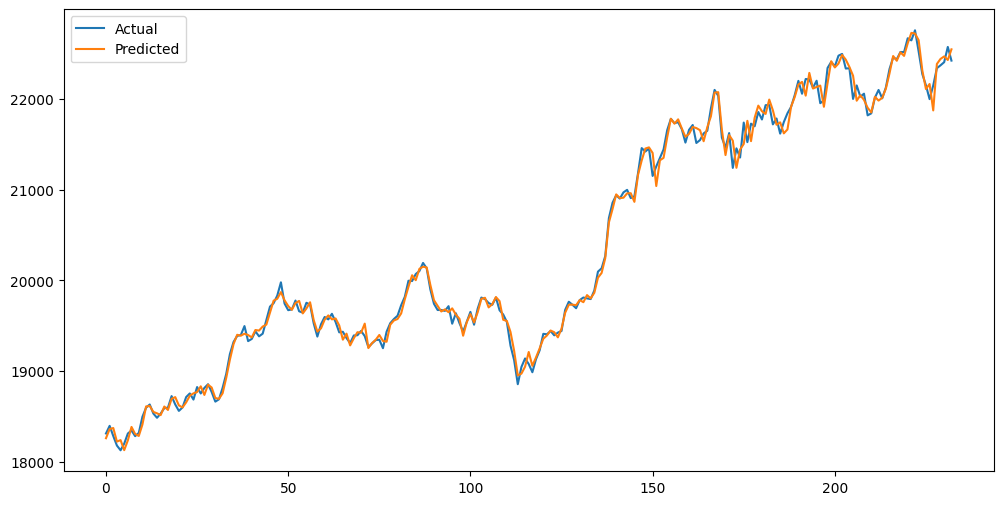

In [60]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(prediction)
plt.legend(["Actual", "Predicted"])
plt.show()

  * After applying Linear regression we can see it is not giving very good results as it tries to `overfitt`.

  * `Here in the metrices we are doing 10**(y_trans) to reverse the impact that is happened on transformation for scaling`.

### Now we are plotting residual to check whether it follows a Normal distribution or not

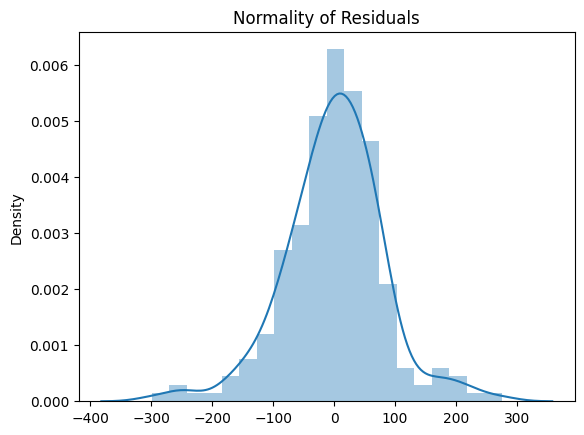

In [71]:
residuals = y_trans - prediction
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

* It clearly follows Normal distribution hence our assumption of `Resudual Normality` is Validated.

### Lets Check for Homoscadasticity of Residuals

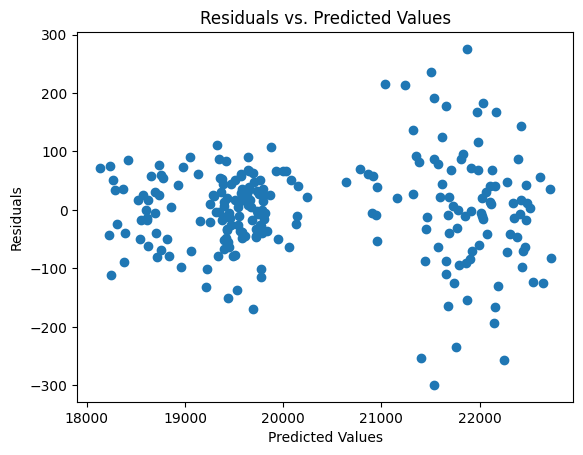

In [81]:
# Homoscadasticity
residuals = y_trans - prediction

# Plot the residuals against the predicted values
plt.scatter(prediction, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

* As `Variance` of Residuals are approximately uniformaly distributed so it also validating the Assumption of `Homoscadasticity`.

* `Here in the metrices we are doing 10**(y_trans)-10**(prediction) to reverse the impact that is happened on transformation for scaling`.

## Model 2. **Ridge Regression**

### RIDGE with Cross Validation and Hyper parameter tuning

In [252]:
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100,200,400,800,1000,1200,1400,1800,10000,70000,80000,82050,90000,100000]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_trans, y_trans)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100, 200, 400, 800, 1000, 1200, 1400,
                                   1800, 10000, 70000, 80000, ...]},
             scoring='neg_mean_squared_error')

In [253]:
print("The best fit alpha value is found out to be:" , ridge_regressor.best_params_)
print("Using", ridge_regressor.best_params_, "MSE:", -ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 82050}

Using  {'alpha': 82050}  MSE:  6394.555321513659


In [259]:
y_train_pred_ridge = ridge_regressor.predict(x_trans)

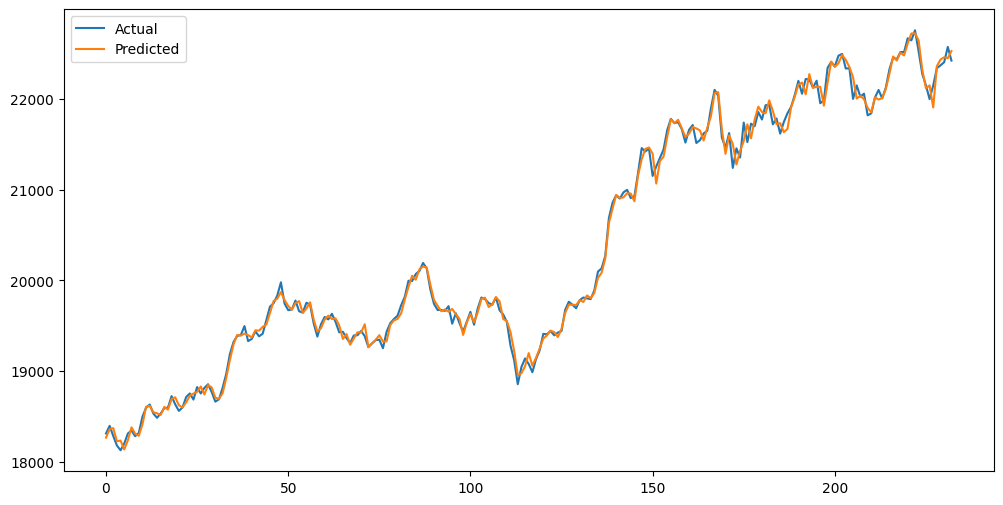

In [260]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(y_train_pred_ridge)
plt.legend(["Actual","Predicted"])
plt.show()



*   After applying RIDGE Regression not very much improvement can be seen in model, still model is clearly `overfitting`



### now we are plotting residual to check whether it follows a Normal distribution or not

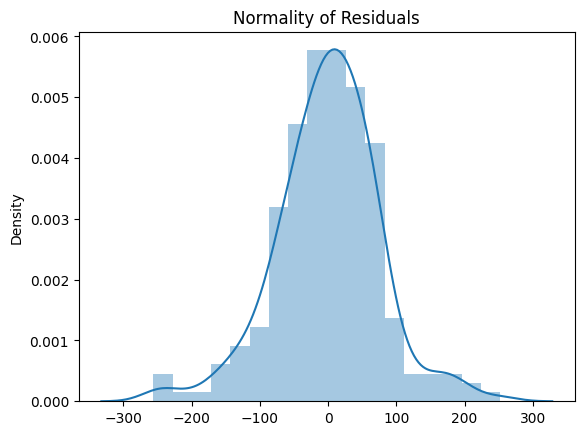

In [87]:
residuals = y_trans - y_train_pred_ridge
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

* It clearly follows Normal distribution hence our assumption of `Resudual Normality` is Validated.

### Lets Check for Homoscadasticity of Residuals

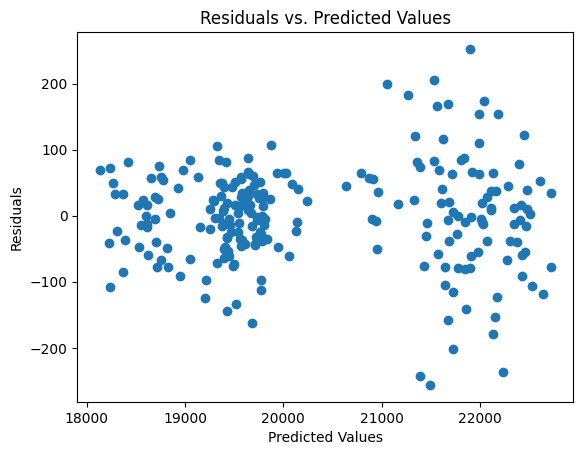

In [89]:
# Homoscadasticity
residuals = y_trans - y_train_pred_ridge

# Plot the residuals against the predicted values
plt.scatter(y_train_pred_ridge, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

* As `Variance` of Residuals are approximately uniformaly distributed so it also validating the Assumption of `Homoscadasticity`

## Model 3. **Lasso Regression**

### Lasso with Cross Validation and Hyper parameter tuning

In [158]:
lasso = Lasso()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100,120,140,160,180,200,220,400,800,1000]}
lasso_regressor = GridSearchCV(lasso, parameters2, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_trans, y_trans)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100, 120, 140, 160, 180, 200, 220,
                                   400, 800, 850, 1000]},
             scoring='neg_mean_squared_error')

In [159]:
print("The best fit alpha value is found out to be:", lasso_regressor.best_params_)
print("Using", lasso_regressor.best_params_, "MSE:", -lasso_regressor.best_score_)

The best fit alpha value is found out to be: {'alpha': 800}
Using {'alpha': 800} MSE: 6208.684511049005


In [92]:
y_train_pred_lasso = lasso_regressor.predict(x_trans)

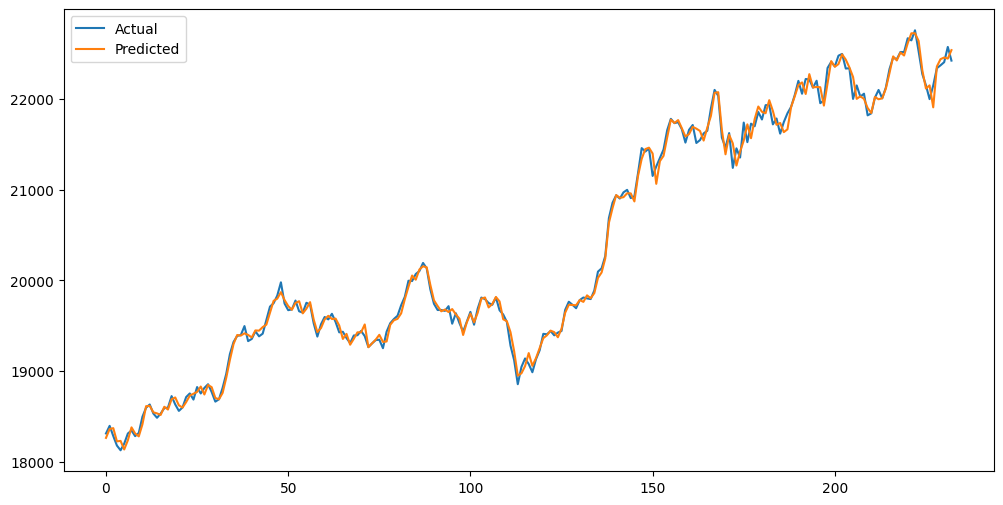

In [256]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(y_train_pred_lasso)
plt.legend(["Actual","Predicted"])
plt.show()



*   we can see after applying Lasso there is some improvements in model as compared to later as model tries to generalise data.


### now we are plotting residual to check whether it follows a Normal distribution or not

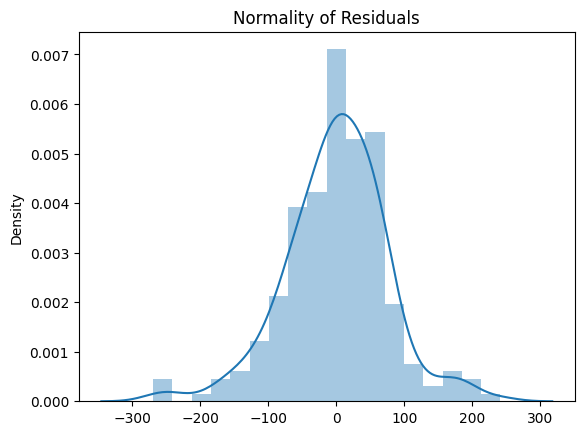

In [257]:
residuals = y_trans - pd.Series(y_train_pred_lasso)
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

* It follows close to Normal distribution hence our assumption of `Resudual Normality` is Validated.

### Lets Check for Homoscadasticity of Residuals

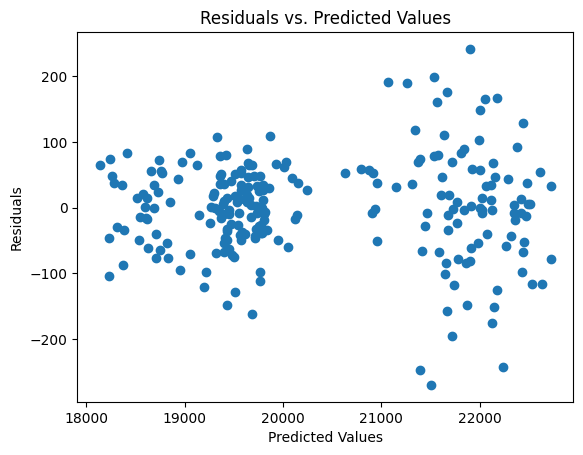

In [258]:
# Homoscadasticity
residuals = y_trans - pd.Series(y_train_pred_lasso)

# Plot the residuals against the predicted values
plt.scatter(pd.Series(y_train_pred_lasso), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

* As `Variance` of Residuals are uniformaly distributed so it also validating the Assumption of `Homoscadasticity`

## Model 4. **Random Forest Regressor**

Here we are going to implement `RandomForest` model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.

In [33]:
# ML Model - 2 Implementation

rf = RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=20, n_estimators=50)

# Fit the Algorithm
rf.fit(x_trans, y_trans)

# Predict on the model
y_pred_trans_rf = rf.predict(x_trans)

In [35]:
mse_trans_rf = mean_squared_error(y_trans, y_pred_trans_rf)
rmse_trans_rf = np.sqrt(mse_trans_rf)
mae_trans_rf = mean_absolute_error(y_trans, y_pred_trans_rf)
# Calculate R² (Coefficient of Determination)
r2_trans_rf = r2_score(y_trans, y_pred_trans_rf)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_trans_rf = 1 - ((1 - r2_trans_rf) * (x_trans.shape[0] - 1) / (x_trans.shape[0] - x_trans.shape[1] - 1))

metric_trans_rf = {'Mean Squared Error': mse_trans_rf, 'Root Mean Squared Error': rmse_trans_rf, 'Mean Absolute Error': mae_trans_rf, 'R² Score': r2_trans_rf, 'Adjusted R²': adjusted_r2_trans_rf}
pd.DataFrame({'Parameters': [element_key for element_key in metric_trans_rf.keys()], 'Results': [element_value for element_value in metric_trans_rf.values()]})

,Parameters,Results
0,Mean Squared Error,6509.359281
1,Root Mean Squared Error,80.680600
2,Mean Absolute Error,60.278119
3,R² Score,0.996357
4,Adjusted R²,0.996158


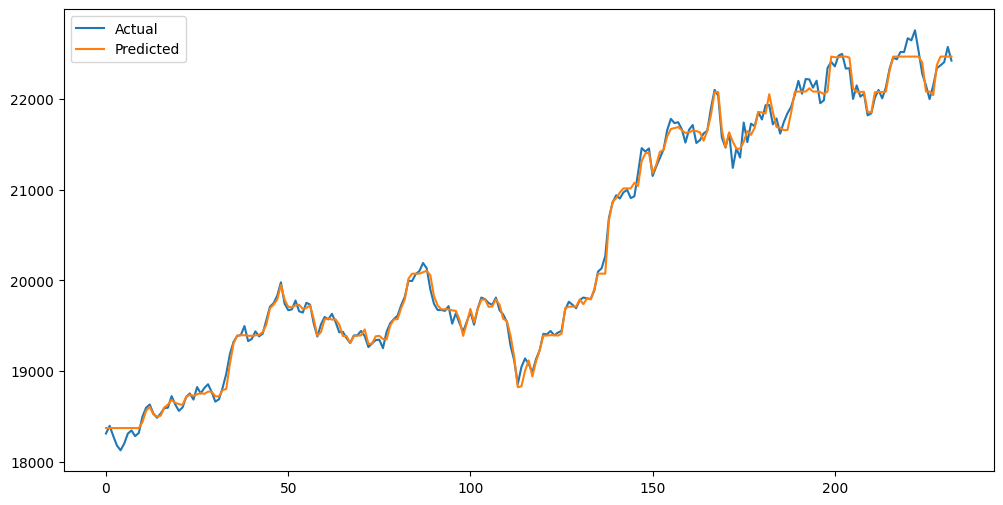

In [101]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(y_pred_trans_rf)
plt.legend(["Actual", "Predicted"])
plt.show()

* After applying `Random forest` our model is clearly less overfitted as compared to previous models.

### Cross-Validation and Hyperparameter Tuning

* We are going to apply `RandomSearchCV` for hyperparameter tuning for achieving best results for our model

In [36]:
param_grid_rf = {
	'n_estimators': [50,80,100,200,300],
	'max_depth': [1,2,6,7,8,9,10,20,30,40],
	'min_samples_split': [5,10,20,30,40,50,100,150,200],
	'min_samples_leaf': [1,2,8,10,20,40,50]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf, verbose=2, cv=5, random_state=42, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_trans, y_trans)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=8, min_

In [38]:
best_model_rf_rs.feature_importances_
best_model_rf_rs

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=30,
                      n_estimators=200)

In [41]:
# Prediction
y_pred_trans_rf_rs = random_search.predict(x_trans)

In [42]:
print('Score for random forest', -random_search.score(x_trans, y_trans))

Score for random forest 18433.36984349027


In [44]:
mse_trans_rf_rs = mean_squared_error(y_trans, y_pred_trans_rf_rs)
rmse_trans_rf_rs = np.sqrt(mse_trans_rf_rs)
mae_trans_rf_rs = mean_absolute_error(y_trans, y_pred_trans_rf_rs)
# Calculate R² (Coefficient of Determination)
r2_trans_rf_rs = r2_score(y_trans, y_pred_trans_rf_rs)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_trans_rf_rs = 1 - ((1 - r2_trans_rf_rs) * (x_trans.shape[0] - 1) / (x_trans.shape[0] - x_trans.shape[1] - 1))

metric_trans_rf_rs = {'Mean Squared Error': mse_trans_rf_rs, 'Root Mean Squared Error': rmse_trans_rf_rs, 'Mean Absolute Error': mae_trans_rf_rs, 'R² Score': r2_trans_rf_rs, 'Adjusted R²': adjusted_r2_trans_rf_rs}
pd.DataFrame({'Parameters': [element_key for element_key in metric_trans_rf_rs.keys()], 'Results': [element_value for element_value in metric_trans_rf_rs.values()]})


,Parameters,Results
0,Mean Squared Error,18433.369843
1,Root Mean Squared Error,135.769547
2,Mean Absolute Error,98.360417
3,R² Score,0.989684
4,Adjusted R²,0.989121


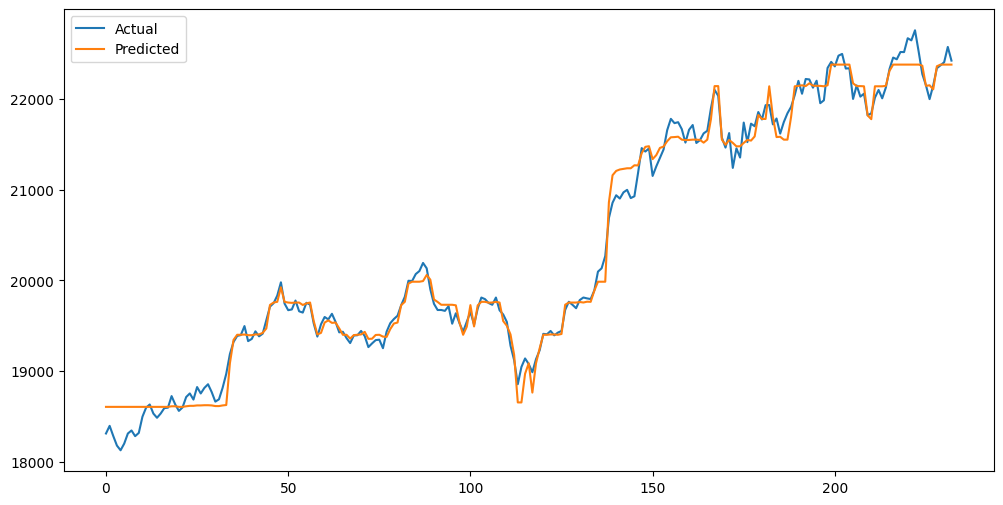

In [108]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(y_pred_trans_rf_rs)
plt.legend(["Actual", "Predicted"])
plt.show()

* **After applying Cross validation and Random Search CV our model is very much generalised and that can be seen in the above chart**

### now we are plotting residual to check whether it follows a Normal distribution or not

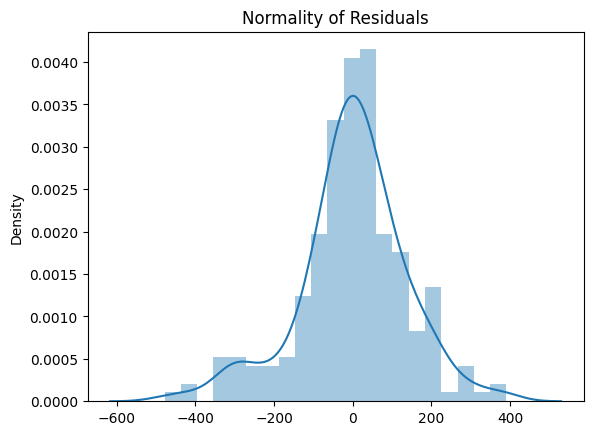

In [109]:
residuals = y_trans - pd.Series(y_pred_trans_rf_rs)
sns.distplot(residuals)
plt.title('Normality of Residuals')
plt.show()

* It follows close to Normal distribution hence our assumption of `Resudual Normality` is Validated.

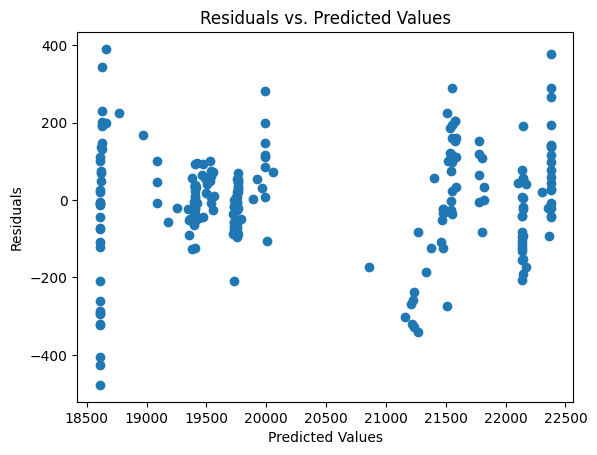

In [111]:
# Homoscadasticity
residuals = y_trans - pd.Series(y_pred_trans_rf_rs)

# Plot the residuals against the predicted values
plt.scatter(pd.Series(y_pred_trans_rf_rs), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

* As `Variance` of Residuals are approximately uniformaly distributed so it also validating the Assumption of `Homoscadasticity`

## Model 5. **XG Boost**

It is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions.

The XGBRegressor class allows us to train a regression model using the XGBoost algorithm which is then used to make predictions on new data.

The model is trained by fitting a sequence of decision trees to the training data, with each new tree trying to correct the errors of the previous trees.

The final model is a weighted sum of these individual trees.

In [19]:
xgb = XGBRegressor()

# Train model
xgb.fit(x_trans, y_trans)

# Predict
y_pred_trans_xgb = xgb.predict(x_trans)

In [20]:
mse_trans_xgb = mean_squared_error(y_trans, y_pred_trans_xgb)
rmse_trans_xgb = np.sqrt(mse_trans_xgb)
mae_trans_xgb = mean_absolute_error(y_trans, y_pred_trans_xgb)
# Calculate R² (Coefficient of Determination)
r2_trans_xgb = r2_score(y_trans, y_pred_trans_xgb)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_trans_xgb = 1 - ((1 - r2_trans_xgb) * (x_trans.shape[0] - 1) / (x_trans.shape[0] - x_trans.shape[1] - 1))

metric_trans_xgb = {'Mean Squared Error': mse_trans_xgb, 'Root Mean Squared Error': rmse_trans_xgb, 'Mean Absolute Error': mae_trans_xgb, 'R² Score': r2_trans_xgb, 'Adjusted R²': adjusted_r2_trans_xgb}
pd.DataFrame({'Parameters': [element_key for element_key in metric_trans_xgb.keys()], 'Results': [element_value for element_value in metric_trans_xgb.values()]})

,Parameters,Results
0,Mean Squared Error,0.008358
1,Root Mean Squared Error,0.091420
2,Mean Absolute Error,0.063808
3,R² Score,1.000000
4,Adjusted R²,1.000000


### Now plotting residuals

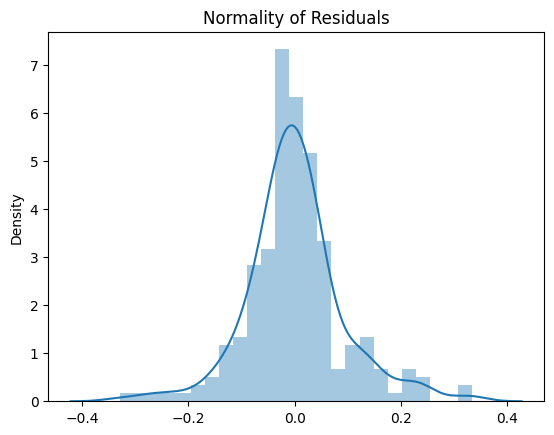

In [21]:
residuals = y_trans - pd.Series(y_pred_trans_xgb)
sns.distplot(residuals)
plt.title('Normality of Residuals')
plt.show()

* Clearly `Normal distribution`.

### Check for Homoscadasticity

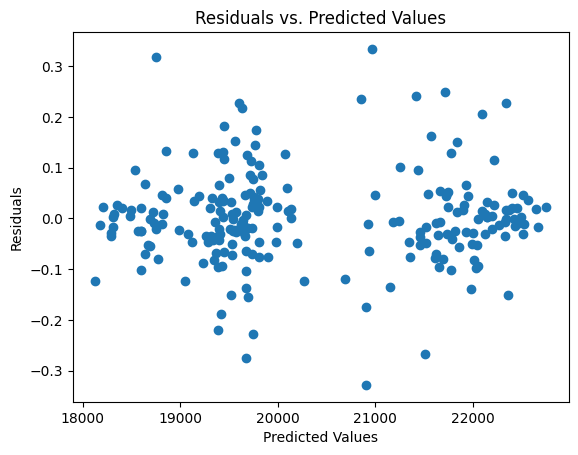

In [22]:
# Homoscadasticity
residuals = y_trans - pd.Series(y_pred_trans_xgb)

# Plot the residuals against the predicted values
plt.scatter(pd.Series(y_pred_trans_xgb), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

* Validates assumption of Homoscadasticity

### XG Boost with Cross Validation and Hyper parameter tuning

In [23]:
param_grid_xg = {
	'n_estimators': [50,80,100,200,300],
	'max_depth': [2,4,6,8,9],
	'colsample_bytree': [0.7, 0.8],
	'reg_alpha': [1.1, 1.2, 1.3],
	'reg_lambda': [1.1, 1.2, 1.3],
	'subsample': [0.7, 0.8, 0.9]
}

# Create the GridSearchCV object
xgb_gs = GridSearchCV(estimator=xgb, param_grid=param_grid_xg, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
xgb_gs.fit(x_trans, y_trans)

# Get the best estimator
best_model_xgb_gs = xgb_gs.best_estimator_

# Predict on the model
y_pred_trans_xgb_gs = xgb_gs.predict(x_trans)

In [68]:
# Get the best estimator
best_model_xgb_gs

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the model
y_pred_trans_xgb_gs = xgb_gs.predict(x_trans)

In [49]:
xgb_gs.score(x_trans, y_trans)

0.9992076920677218

In [50]:
mse_trans_xgb_gs = mean_squared_error(y_trans, y_pred_trans_xgb_gs)
rmse_trans_xgb_gs = np.sqrt(mse_trans_xgb_gs)
mae_trans_xgb_gs = mean_absolute_error(y_trans, y_pred_trans_xgb_gs)
# Calculate R² (Coefficient of Determination)
r2_trans_xgb_gs = r2_score(y_trans, y_pred_trans_xgb_gs)
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adjusted_r2_trans_xgb_gs = 1 - ((1 - r2_trans_xgb_gs) * (x_trans.shape[0] - 1) / (x_trans.shape[0] - x_trans.shape[1] - 1))

metric_trans_xgb_gs = {'Mean Squared Error': mse_trans_xgb_gs, 'Root Mean Squared Error': rmse_trans_xgb_gs, 'Mean Absolute Error': mae_trans_xgb_gs, 'R² Score': r2_trans_xgb_gs, 'Adjusted R²': adjusted_r2_trans_xgb_gs}
pd.DataFrame({'Parameters': [element_key for element_key in metric_trans_xgb_gs.keys()], 'Results': [element_value for element_value in metric_trans_xgb_gs.values()]})

,Parameters,Results
0,Mean Squared Error,1415.733685
1,Root Mean Squared Error,37.626237
2,Mean Absolute Error,29.557831
3,R² Score,0.999208
4,Adjusted R²,0.999164


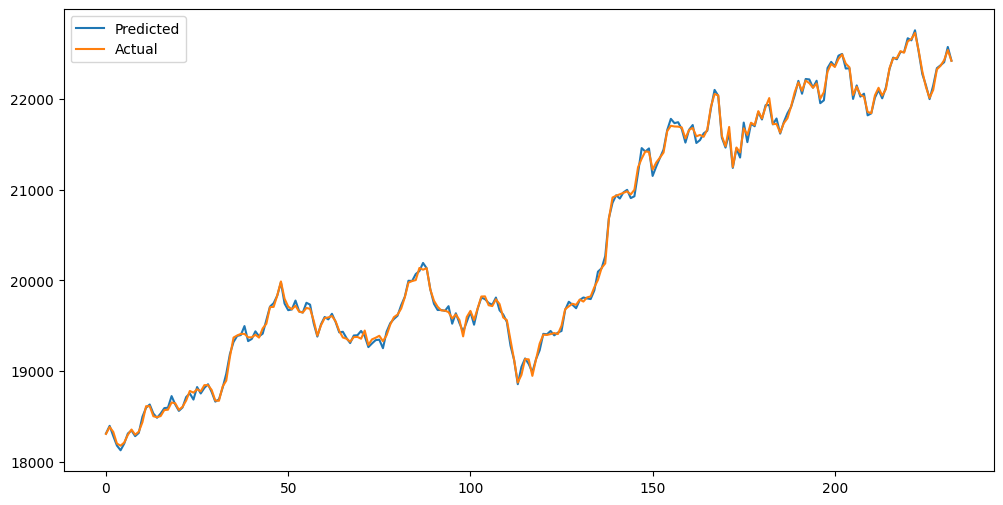

In [65]:
plt.figure(figsize=(12,6))
plt.plot(np.array(y_trans))
plt.plot(y_pred_trans_xgb_gs)
plt.legend(["Predicted", "Actual"])
plt.show()

* This model has almost overfitted.

### Plotting residual to check whether it follows a Normal distribution or not

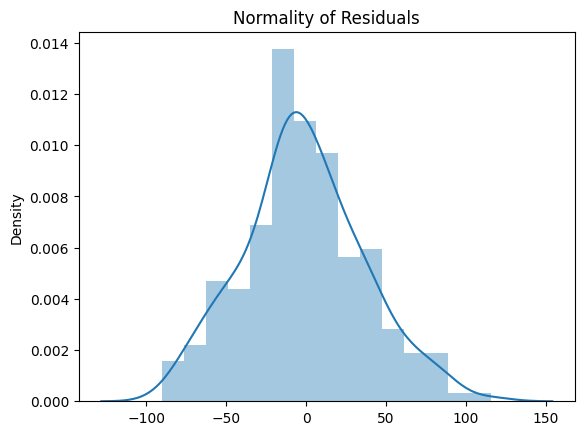

In [57]:
residuals = y_trans - pd.Series(y_pred_trans_xgb_gs)
sns.distplot(residuals)
plt.title('Normality of Residuals')
plt.show()

* Clearly `Normal distribution`.

### Check for Homoscadasticity of Residuals

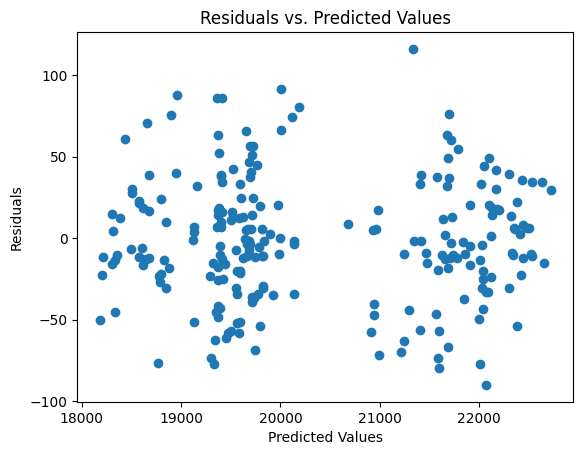

In [59]:
# Homoscadasticity
residuals = y_trans - pd.Series(y_pred_trans_xgb_gs)

# Plot the residuals against the predicted values
plt.scatter(pd.Series(y_pred_trans_xgb_gs), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

As `Variance` of Residuals are approximately uniformaly distributed so it also validating the Assumption of `Homoscadasticity`

## After experimenting with various models now we are are using **GridSearchCV** for getting a Best model.

In [75]:
models = {
	'Linear Regression': {
		'model': LinearRegression(),
		'params': {
		}
	},
	'Linear Regression Ridge': {
		'model': Ridge(),
		'params': {
			'alpha': [82050]
		}
	},
	'Linear Regression Lasso': {
		'model': Lasso(),
		'params': {
			'alpha': [800]
		}
	},
	'Random Forest Regressor': {
		'model': RandomForestRegressor(),
		'params': {
			'max_depth':[9],
			'min_samples_leaf': [2],
			'min_samples_split': [30],
			'n_estimators': [200]
		}
	},
	'XG Boost': {
		'model': XGBRegressor(objective='reg:squarederror'),
		'params': {
			'n_estimators': [50,80,100,200,300],
			'max_depth': [2,4,6,8,9],
			'colsample_bytree': [0.7, 0.8],
			'reg_alpha': [1.1, 1.2, 1.3],
			'reg_lambda': [1.1, 1.2, 1.3],
			'subsample': [0.7, 0.8, 0.9]
		}
	}
}

In [76]:
results = []

for model_name, model_params in models.items():
	gs = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='neg_mean_squared_error')
	gs.fit(x_trans, y_trans)
	results.append({
		'Model': model_name,
		'Best Parameters': gs.best_params_,
		'Best Score': -gs.best_score_
	})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
results_df.index = results_df.index + 1
results_df

,Model,Best Parameters,Best Score
1,Linear Regression,{},6414.376751
2,Linear Regression Ridge,{'alpha': 82050},6383.342591
3,Linear Regression Lasso,{'alpha': 800},6223.849379
4,Random Forest Regressor,"{'max_depth': 9, 'min_samples_leaf': 2, 'min_s...",238158.675931
5,XG Boost,"{'colsample_bytree': 0.8, 'max_depth': 2, 'n_e...",88391.839667


Here we conclude that `RandomForest` is best model for us with a Best score (RMSE) of 135.76.


It means it clearly reducing the overfitting and tends to generalising on new data.

# ***Step 11. Conclusion***

The main goal of the project is to create a machine learning model which can predict the closing price of NSEI stock, opening, closing, high price and similar features.

Developed 5 models Linear Regression, Ridge Regression, Lasso Regression, XG Boost and Random Forest Regressor.
Random Forest Regressor model shows promising result, therefore it can be used to solve this problem. It also considering all new added features and taking care of multicollinearity.

We found that the distribution of all our variables is approximately normal. So we did not perform any transformation on them to come on common scaling.

I considered to take mean of `Open`, `High` and `Low` features. Additional features were engineered by taking lags to capture the temporal trends and patterns.

The dataset has only daily related prices for a year, 5 to 10-year data would be more accurate as model can analyze important patterns like week opening price and weekend price. `Volume` of the data if provided can also be useful in making prediction. A stock prediction involved many aspects like holidays, political decisions, events, un precedented disasters, human decisions. This can be better predicted by having all these features and using time series models like ARIMA and LSTM can be predicted more accurately.

Given the dataset and features, our model is performing well on all data-points.
With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.
